First we'll load and inspect the CSV from Kaggle. The CSV is a database on Steam games from 2025.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download srgiomanhes/steam-games-dataset-2025
!unzip steam-games-dataset-2025.zip
steam = pd.read_csv("steam_games.csv")

mkdir: cannot create directory ‘/home/codespace/.kaggle’: File exists
Dataset URL: https://www.kaggle.com/datasets/srgiomanhes/steam-games-dataset-2025
License(s): MIT
Archive:  steam-games-dataset-2025.zip
  inflating: steam_games.csv         


Let's get a general sense of what the dataframe is, including its column names to begin to understand what data the CSV has.

In [2]:
# Rows and columns
print(steam.shape)
print(steam.columns)

(71429, 21)
Index(['steam_appid', 'name', 'developers', 'publishers', 'categories',
       'genres', 'required_age', 'n_achievements', 'platforms', 'is_released',
       'release_date', 'additional_content', 'total_reviews', 'total_positive',
       'total_negative', 'review_score', 'review_score_desc',
       'positive_percentual', 'metacritic', 'is_free', 'price_initial (USD)'],
      dtype='object')


In [3]:
# Prelim check for null or missing values
steam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71429 entries, 0 to 71428
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   steam_appid          71429 non-null  int64  
 1   name                 71429 non-null  object 
 2   developers           71429 non-null  object 
 3   publishers           71429 non-null  object 
 4   categories           71429 non-null  object 
 5   genres               71429 non-null  object 
 6   required_age         71429 non-null  int64  
 7   n_achievements       71429 non-null  int64  
 8   platforms            71429 non-null  object 
 9   is_released          71429 non-null  bool   
 10  release_date         71429 non-null  object 
 11  additional_content   71429 non-null  object 
 12  total_reviews        71429 non-null  int64  
 13  total_positive       71429 non-null  int64  
 14  total_negative       71429 non-null  int64  
 15  review_score         71429 non-null 

In [165]:
# Looks like there are no missing values. Let's check for duplicates.
print(steam.duplicated().sum())

0


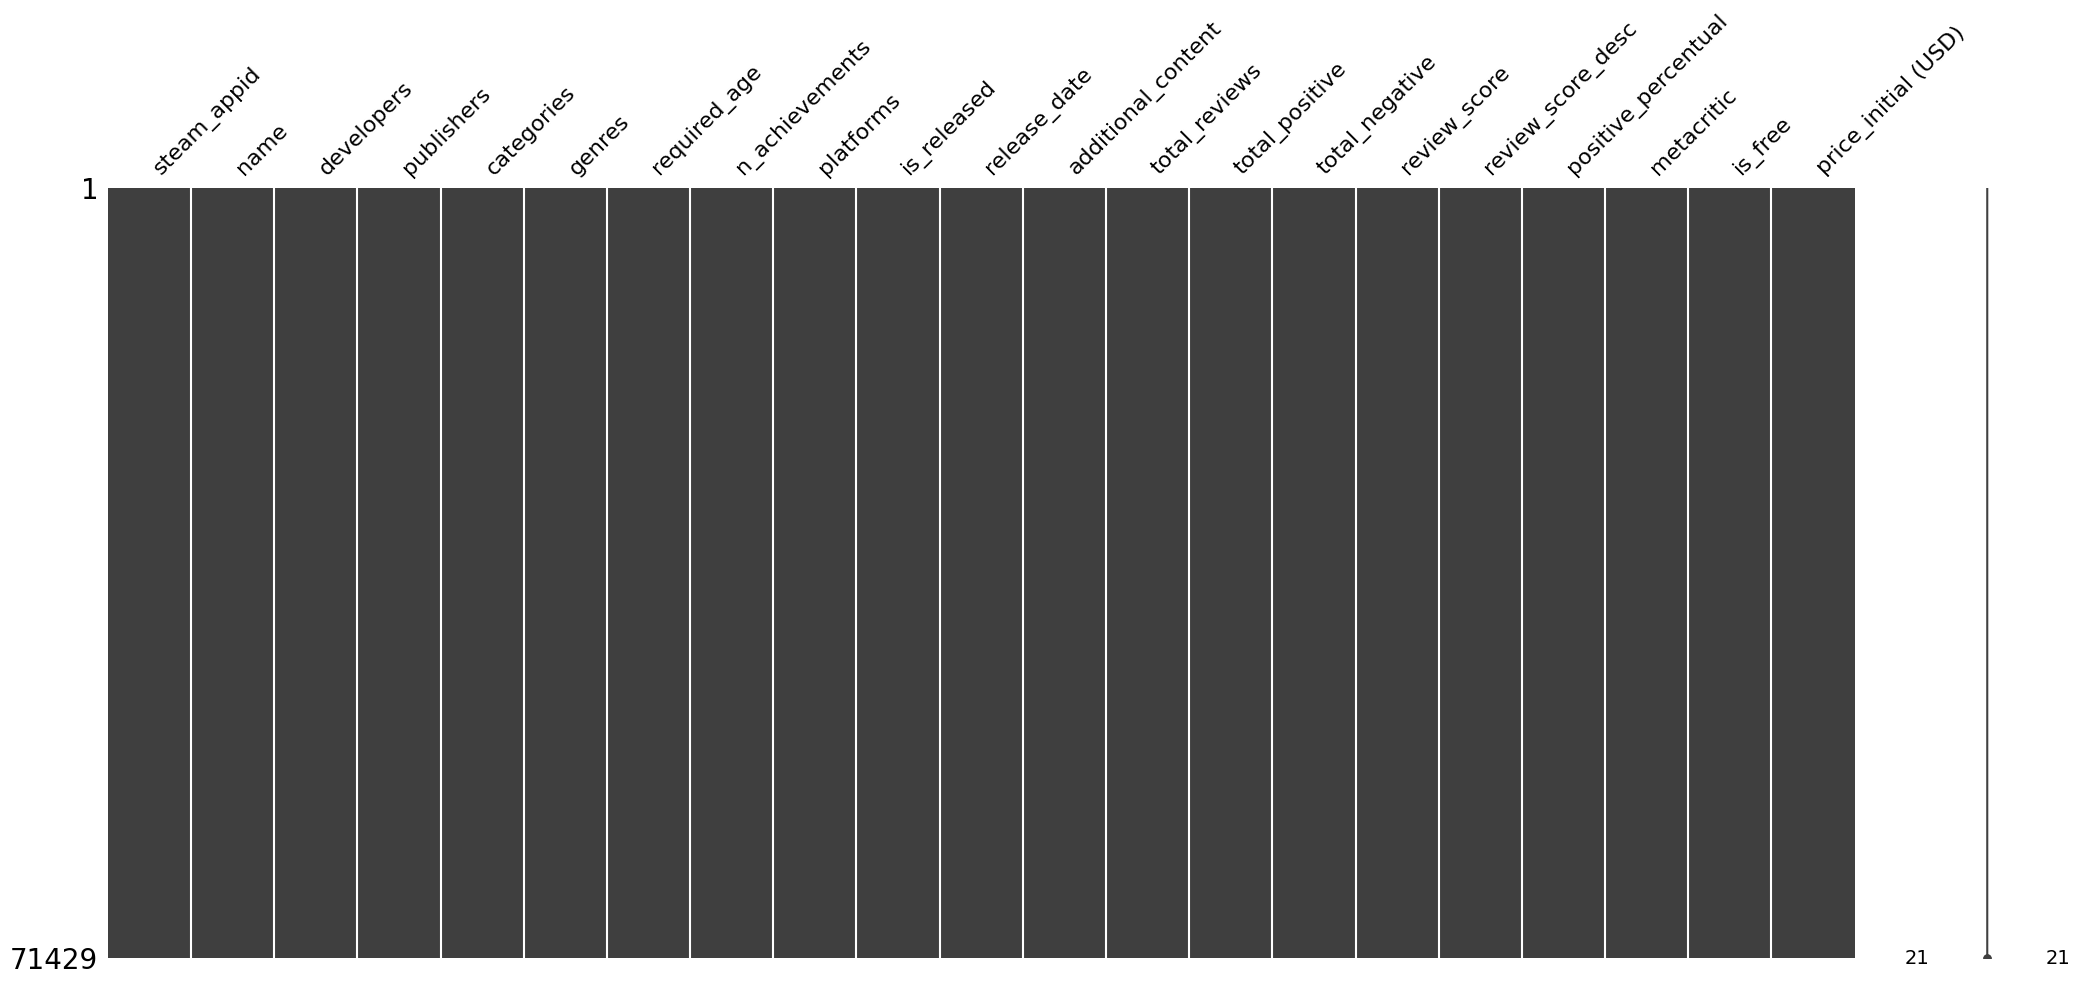

In [5]:
# No duplicates! Let's make sure there are no missing values with the missingno package.
!pip install -q missingno
import missingno as msno
msno.matrix(steam)
plt.show()


In [6]:
# Full steam ahead! All bars. Let's get a sense of the first few rows of data with the head() function.
steam.head()

,steam_appid,name,developers,publishers,categories,genres,required_age,n_achievements,platforms,is_released,...,additional_content,total_reviews,total_positive,total_negative,review_score,review_score_desc,positive_percentual,metacritic,is_free,price_initial (USD)
0,2719580,勇者の伝説の勇者,['ぽけそう'],['ぽけそう'],"['Single-player', 'Family Sharing']","['Casual', 'Indie']",0,0,['windows'],True,...,[],0,0,0,0.0,No user reviews,0.0,0,False,0.99
1,2719590,Light No Fire,['Hello Games'],['Hello Games'],"['Single-player', 'Multi-player', 'Co-op', 'On...","['Action', 'Adventure']",0,0,['windows'],False,...,[],0,0,0,0.0,No user reviews,0.0,0,False,0.00
2,2719600,Lorhaven: Cursed War,['GoldenGod Games'],['GoldenGod Games'],"['Single-player', 'Multi-player', 'PvP', 'Shar...","['RPG', 'Strategy']",0,32,"['windows', 'mac']",True,...,[],9,8,1,0.0,9 user reviews,88.9,0,False,9.99
3,2719610,PUIQ: Demons,['Giammnn'],['Giammnn'],"['Single-player', 'Steam Achievements', 'Famil...","['Action', 'Casual', 'Indie', 'RPG']",0,28,['windows'],True,...,[],0,0,0,0.0,No user reviews,0.0,0,False,2.99
4,2719650,Project XSTING,['Saucy Melon'],['Saucy Melon'],"['Single-player', 'Steam Achievements', 'Steam...","['Action', 'Casual', 'Indie', 'Early Access']",0,42,['windows'],True,...,[],9,9,0,0.0,9 user reviews,100.0,0,False,7.99


In [7]:
# We're dealing with multiple languages. I wonder if this will affect anything. \
# For now I'll treat everything equally. Are there any null values in columns?
steam.isnull().sum()

steam_appid            0
name                   0
developers             0
publishers             0
categories             0
genres                 0
required_age           0
n_achievements         0
platforms              0
is_released            0
release_date           0
additional_content     0
total_reviews          0
total_positive         0
total_negative         0
review_score           0
review_score_desc      0
positive_percentual    0
metacritic             0
is_free                0
price_initial (USD)    0
dtype: int64

It looks like there are no missing or null values in the dataset. I picked a good one for beginners to analyze. Now that we have a sense of what the steam database contains, let's dive a bit deeper into the data and find whatever is interesting about it, starting with publishers and games.

In [8]:
# Number of publishers.
publishers = steam["publishers"].nunique()
print(f"Publisher Count:", publishers)

#Number of games per publisher.
publisher_game_count = steam["publishers"].value_counts()
print(f"Count of Games per Publisher", publisher_game_count)

Publisher Count: 44187
Count of Games per Publisher publishers
[]                       493
['Big Fish Games']       320
['8floor']               213
['HH-Games']             138
['Kagura Games']         119
                        ... 
['Connor Bradley']         1
['YUME NODE']              1
['Omnipath Co.,Ltd.']      1
['HOU JIA WEN']            1
['Death Limited']          1
Name: count, Length: 44187, dtype: int64


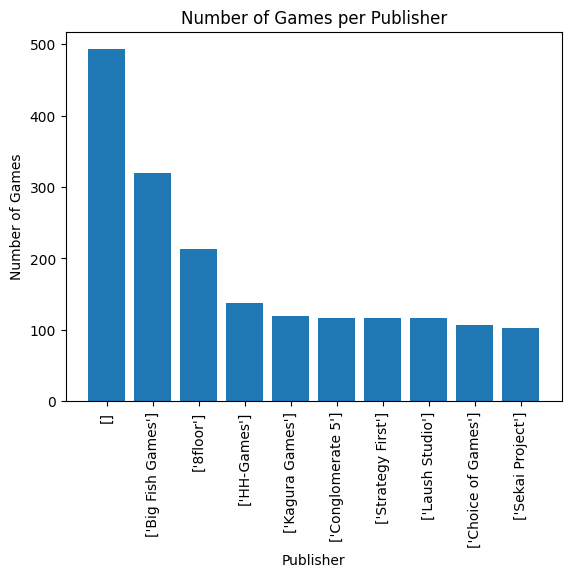

In [9]:
# That gave me a lot of info in rows. I wonder if I can 1) plot it in a bar graph and\
# 2) maybe constrain it to the top 10 publishers.
plt.bar(publisher_game_count.index[:10], publisher_game_count.values[:10])
plt.title("Number of Games per Publisher")
plt.xlabel("Publisher")
plt.ylabel("Number of Games")
plt.xticks(rotation = 90)
plt.show()

This bar plot shows us the largest game publisher by number of games is "Unknown" with close to 500 games.

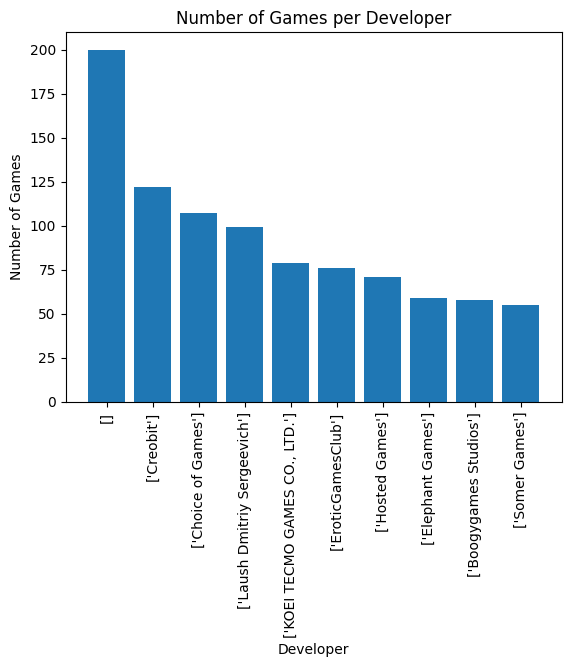

In [10]:
# Compare the top 10 games by publisher with top 10 games by developer.
developer_game_count = steam["developers"].value_counts()
plt.bar(developer_game_count.index[:10], developer_game_count.values[:10])
plt.title("Number of Games per Developer")
plt.xlabel("Developer")
plt.ylabel("Number of Games")
plt.xticks(rotation = 90)
plt.show()

This bar plot tells us that close to 200 games have an unknown developer. This is interesting because our missing values check came up with no missing or null values.
We'll move on into pricing to see if the top 10 developer and pubilshers have the highest pricing.

In [11]:
# Let's see what's in the release date column.
print(steam["release_date"])

# There are some values that say "Not Released". I hope this does not affect the plot. \
# I'll count the number of "Not Released" values and then try to plot a time series graph.


0                 2024-01-04
1               Not Released
2                 2024-01-26
3                 2024-02-17
4                 2024-01-05
                ...         
71424    2024-02-09 00:00:00
71425           Not Released
71426    2024-09-27 00:00:00
71427    2023-07-14 00:00:00
71428    2023-02-15 00:00:00
Name: release_date, Length: 71429, dtype: object


In [173]:
not_released = steam["release_date"].str.contains("Not Released").sum()
print(not_released)

13388


In [174]:
# There are over 13,000 games that have not been released. I'll drop those then try a time series graph.

# Drop rows with "Not Released".
steam = steam[~steam["release_date"].str.contains("Not Released")]

# Reset index
steam.reset_index(drop=True, inplace=True)

# Verify rows have been dropped
print(steam["release_date"].str.contains("Not Released").sum())


0


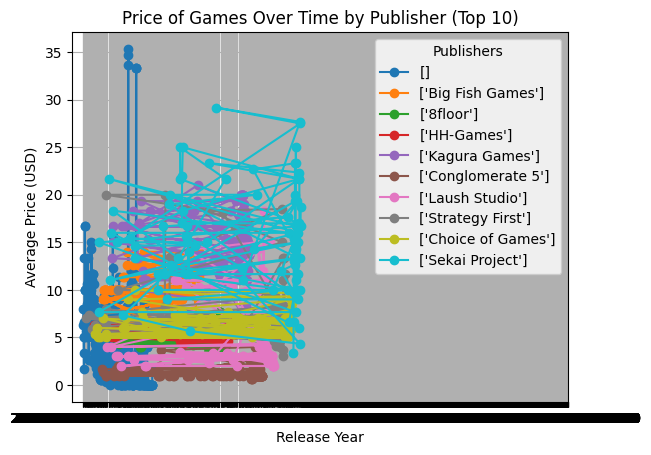

In [ ]:
#Time series time.

# steam["release_date"] = pd.to_datetime(steam["release_date"], errors="coerce")
# steam["release_year"] = steam["release_date"].dt.year

# Mean price by publisher per year
publisher_price = steam.groupby(["publishers", "release_date"])["price_initial (USD)"].mean().reset_index()

# Top 10 publishers by game count
top_10_publishers = publisher_game_count.index[:10]

# Plot
for publisher in top_10_publishers:
    subset = publisher_price[publisher_price["publishers"] == publisher]

    # Rolling mean
    subset = subset.sort_values("release_date")
    subset["price_smoothed"] = subset["price_initial (USD)"].rolling(window = 3, min_periods = 1).mean()
    plt.plot(subset["release_date"], subset["price_smoothed"], label=publisher, marker='o', linestyle="-")

# Every 2nd year and sort the ticks
plt.xticks(ticks=sorted(steam["release_date"].dropna().unique())[::2])

plt.title("Price of Games Over Time by Publisher (Top 10)")
plt.xlabel("Release Year")
plt.ylabel("Average Price (USD)")
plt.legend(title="Publishers")
plt.grid(True)
plt.show()

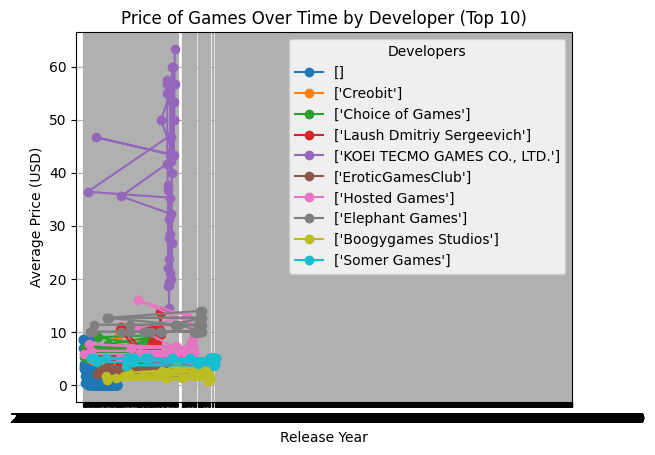

In [184]:
# And for the top 10 developers.

# Mean price by publisher per year
developer_price = steam.groupby(["developers", "release_date"])["price_initial (USD)"].mean().reset_index()

# Top 10 publishers by game count
top_10_developers = developer_game_count.index[:10]

# Plot
for developer in top_10_developers:
    subset = developer_price[developer_price["developers"] == developer]

    # Rolling mean
    subset = subset.sort_values("release_date")
    subset["price_smoothed"] = subset["price_initial (USD)"].rolling(window = 3, min_periods = 1).mean()
    plt.plot(subset["release_date"], subset["price_smoothed"], label=developer, marker='o', linestyle="-")

# Every 2nd year and sort the ticks
plt.xticks(ticks=sorted(steam["release_date"].dropna().unique())[::2])

plt.title("Price of Games Over Time by Developer (Top 10)")
plt.xlabel("Release Year")
plt.ylabel("Average Price (USD)")
plt.legend(title="Developers")
plt.grid(True)
plt.show()

The above plots show us that both the top 10 developers and publishers have too many games to clearly see. 

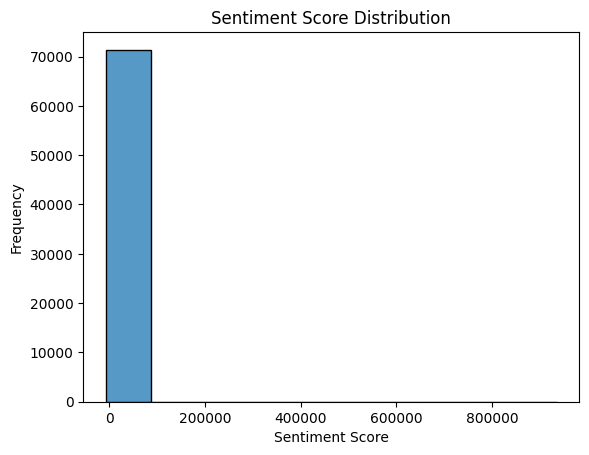

In [100]:
#Sentiment Score
steam["sentiment_score"] = steam["total_positive"] - steam["total_negative"]
sns.histplot(steam["sentiment_score"], bins = 10, kde = False)
plt.title("Sentiment Score Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

This histogram doesn't really tell us anything. Let's look at sentiment by top publishers and developers and see if they tell a more intersting story.

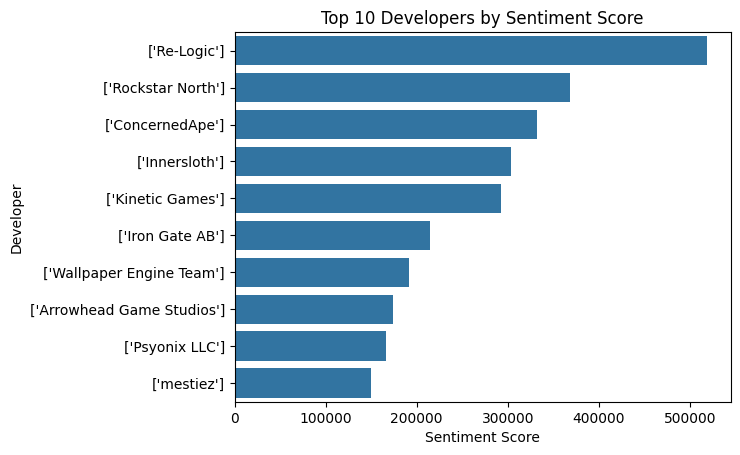

In [107]:
sentiment_by_developer = steam.groupby("developers")["sentiment_score"].mean().reset_index()
top_sentiment_developers = sentiment_by_developer.sort_values(by="sentiment_score", ascending=False).head(10)

sns.barplot(y=top_sentiment_developers["developers"], x=top_sentiment_developers["sentiment_score"])
plt.title("Top 10 Developers by Sentiment Score")
plt.xlabel("Sentiment Score")
plt.ylabel("Developer")
plt.show()

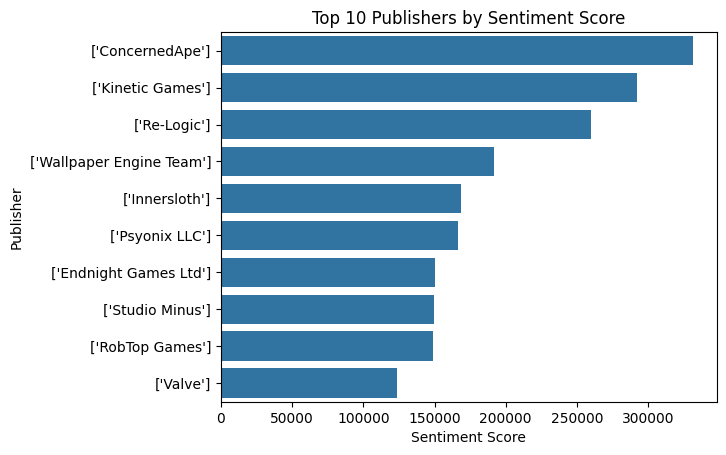

In [108]:
sentiment_by_publisher = steam.groupby("publishers")["sentiment_score"].mean().reset_index()
top_sentiment_publisher = sentiment_by_publisher.sort_values(by="sentiment_score", ascending=False).head(10)

sns.barplot(y=top_sentiment_publisher["publishers"], x=top_sentiment_publisher["sentiment_score"])
plt.title("Top 10 Publishers by Sentiment Score")
plt.xlabel("Sentiment Score")
plt.ylabel("Publisher")
plt.show()

Sentiment analysis shows us that top 10 developers and top 10 publishers by sentiment score differ.
Not only that, Developers have a higher sentiment max score than publishers.